# Basic Filter Operations

* Author: Johannes Maucher
* Last Update: 28th January 2021

Object Recognition integrates image processing techniques. Image Processing is realized by applying **filters** on the image. Examples for filtering in Object Recognition:

* Preprocessing of images to **enhance quality**, e.g. noise surpression
* Local feature based recognition techniques apply filter methods for **finding keypoints**
* **Template Matching** is a simple object recognition method which just correlates a filter with the image.
* In order to achieve **scale invariance** in recognition, usually Gaussian Pyramids are applied to generate different scale levels. 

## 1-dimensional Filtering

**Notation:**

* $f(i)$ is the $i.th$ component of the 1-D diskret input signal
* $h(u)$ is the $u.th$ component of the 1-D diskret filter kernel (or the $u.th$ filter weight). Total filter length is $2k+1$
* $g(i)$ is the $i.th$ component of the 1-D diskret output signal



**Correlation Filtering** $g=h \circledast f$

\begin{equation}
g(i) = \sum\limits_{u=-k}^{u=k} h(u) f(i+u) 
\end{equation}

**Convolution Filtering** $g=h*f$
\begin{equation}
g(i) = \sum\limits_{u=-k}^{u=k} h(u) f(i-u) 
\end{equation}

**Correlation- and Convolutional Filtering of a 1-dimensional analog signal:**

<img src="https://maucher.home.hdm-stuttgart.de/Pics/ComparisonConvolutionCorrelation.png" style="width:500px" align="center">

### Example 1-dimensional discrete filtering:

**Without extension (padding) of the signal**

The input signal:
\begin{equation}
f= \left[ 1,1,1,1,2,2,2,1,1,1,1 \right]
\end{equation}
shall be convolved with the **length-3 moving average filter:**
\begin{equation}
h=\left[ \frac{1}{3},\frac{1}{3},\frac{1}{3}\right]
\end{equation}

The result $g$ of convolutional filtering is:
\begin{eqnarray*}
g &=& h * f \\
  &=& \left[ \frac{1}{3},\frac{1}{3},\frac{1}{3}\right] * \left[ 1,1,1,1,2,2,2,1,1,1,1 \right] \\
  &=& \left[1,1,\frac{4}{3},\frac{5}{3},\frac{6}{3},\frac{5}{3},\frac{4}{3},1,1 \right]
\end{eqnarray*}


<a id="1dextension"></a>
### Signal Extension (Padding)

As can be seen in the previous example the output of the filtering $g$ is shorter than the input $f$. This is due to the fact that the first position, at which the scalar-product between the filter coefficients and the signal-values can be calculated, is not at the first position, but at the $p.th$, position of the signal, where 

$$
p=\lfloor \frac{a-1}{2} \rfloor
$$

and $a$ is the filter size (number of filter-coefficients). As can be seen the filtered signal is $2 \cdot p$ components shorter, than the input. 

In order to avoid shorter output-signals, the input signal is usually **extended (padded)**. This means that $p$ values are attached at the start and at the end of the signal. For the question *which values shall be attached to the signal?* the following options exist: 


- **nearest:** Use the value at the boundary

$$
\left[1,2,3 \right] \Rightarrow \left[1,1,2,3,3 \right]
$$

- **wrap:** Periodically replicate the array

$$
\left[1,2,3 \right] \Rightarrow \left[3,1,2,3,1 \right]
$$

- **reflect:** Reflect the array at the boundary

$$
\left[1,2,3 \right] \Rightarrow \left[1,1,2,3,3 \right]
$$

- **constant** Use a constant value, e.g. $0.0$

$$
\left[1,2,3 \right] \Rightarrow \left[0,1,2,3,0 \right]
$$

See also [Scipy documentation](http://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html)

With the extension option **nearest** the output of the example above is:

\begin{eqnarray*}
g &=& h * f \\
  &=& \left[ \frac{1}{3},\frac{1}{3},\frac{1}{3}\right] * \left[ 1,1,1,1,2,2,2,1,1,1,1 \right] \\
  &=& \left[1,1,1,\frac{4}{3},\frac{5}{3},\frac{6}{3},\frac{5}{3},\frac{4}{3},1,1,1 \right]
\end{eqnarray*}

### Implementation of 1-dimensional discrete filtering

In this subsection the already introduced example signal $f$ is convolved with different filters $g$. The goals are 

* to demonstrate how filtering can be implemented in Python
* introduce some important filters and show their effect


In [1]:
%matplotlib inline
import scipy.ndimage as ndi
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(precision=3)

The input signal x1 (same as $f$ in the example above) is defined as a numpy-array. It is then displayed using a matplotlib stem-plot. 

Signal:  [1 1 1 1 2 2 2 1 1 1 1]


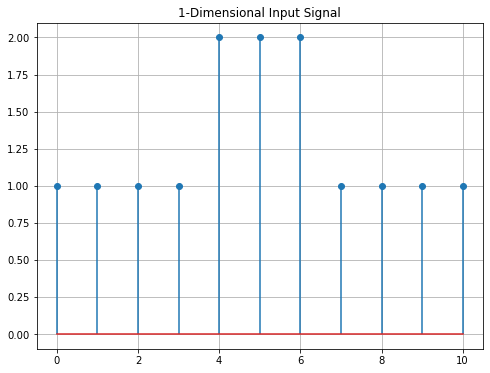

In [2]:
x1=np.array([1,1,1,1,2,2,2,1,1,1,1])
t1=np.arange(len(x1))
print("Signal: ",x1)

plt.figure(figsize=(8,6))
plt.grid(True)
plt.stem(x1)
plt.title('1-Dimensional Input Signal')
plt.show()

**Average Filter:**

Signal x1 is then convolved with an average-filter of length 3. For this the scipy function `convolve1d()` is applied. Same as the input signal, the filter is also implemented as a numpy-array.

Filter:  [0.333 0.333 0.333]


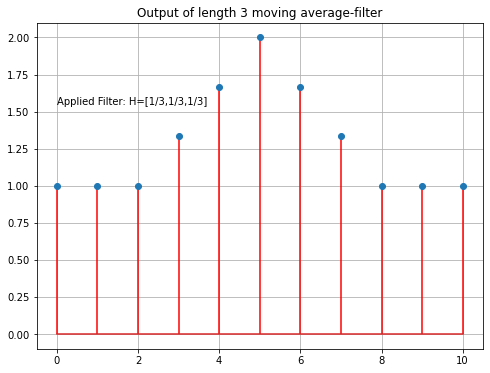

In [3]:
FL=3 #filter length
filt=1.0/FL*np.ones(FL) #Average Filter
print("Filter: ",filt)
fo1=ndi.convolve1d(x1, filt, output=np.float64, mode='nearest')
plt.figure(figsize=(8,6))
plt.grid(True)
plt.stem(fo1,linefmt="r")
plt.title('Output of length 3 moving average-filter')
plt.text(0,1.55,'Applied Filter: H=[1/3,1/3,1/3]')
plt.show()

<a id="1dimgrad"></a>
**Gradient Filter:**

Next the same input signal x1 is convolved with a gradient-filter 

$$
h=[1,0,-1].
$$

The output of this filter can be interpreted as the gradient of the input signal. The output is 0, at all positions, where there is no variation in the signal values, the output is $>0$, if the signal-values increase and $<0$ if the signal values decrease: 

Text(6, 0.5, 'Applied Filter: H=[1.0,0.0,-1.0]')

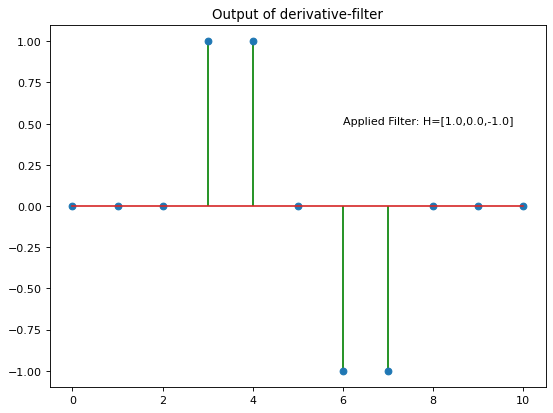

In [4]:
fo2=ndi.convolve1d(x1, [1.0,0.0,-1.0], output=np.float64, mode='nearest')
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(fo2,linefmt='g')
plt.title('Output of derivative-filter')
plt.text(6,0.5,'Applied Filter: H=[1.0,0.0,-1.0]')

## 2-dimensional Filtering
The same concepts as introduced above for the 1-dimensional case can be applied for 2-dimensional signals and 2-dimensional filters. 

**Notation:**

- $F(i,j)$ is the component in row $i$, column $j$ of the 2-dimensional diskret input signal
- $H(u,v)$ is the component in row $u$, column $v$ of the 2-dimensional diskret filter kernel 
- $G(i,j)$ is the component in row $i$, column $j$ of the 2-dimensional diskret output signal



**Correlation Filtering $G=H \circledast F$**

\begin{equation}
G(i,j) = \sum\limits_{u=-k}^{k}\sum\limits_{v=-k}^{k} H(u,v) F(i+u,j+v) 
\label{eq:2dimFilter} 
\end{equation}

**Convolution Filtering $G=H*F$:**

\begin{equation}
G(i,j) = \sum\limits_{u=-k}^{k}\sum\limits_{v=-k}^{k} H(u,v) F(i-u,j-v)
\end{equation}

### Example 2-dimensional discrete filtering

**Without extension:**

For the sake of clarity, in the picture below only the first and last positon are shown. However, the calculation of the 2-dimensional scalar-product between the filter-coefficients and the input-signal is performed at any possible shift of the filter within the image.  

<img src="https://maucher.home.hdm-stuttgart.de/Pics/ConvolutionConceptSmall.png" width="500" align="center">

For 2-dimensional filtering the same extension-options (padding) can be applied as mentioned in the [1-dimensional case](#1dextension).

### Implementation of 2-dimensional discrete filtering

The required packages are again

In [5]:
import scipy.ndimage as ndi
import numpy as np
from matplotlib import pyplot as plt

Two 2-dimensional signals x1 and x2 are implemented below. Both images are defined as numpy-arrays of shape (10,10). 

- **Image x1:** The signal values are 1 (white) in the (4,4)-center region and 0 (black) elsewhere. 
- **Image x2:** The pixels of this image are random integers within the range $[0,\ldots,9]$.

For the display of the 2-dimensional signal the matplotlib method imshow() is applied

Text(0.5, 1.0, 'Image x2')

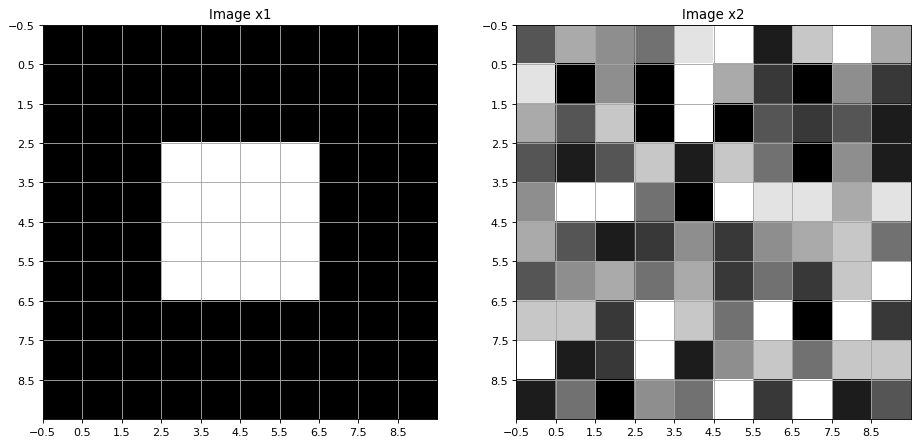

In [6]:
x1=np.zeros((10,10))
x1[3:7,3:7]=1

np.random.seed(1234)
x2=np.random.randint(0,10,(10,10))

plt.figure(num=None, figsize=(14,7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(x1,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Image x1')

plt.subplot(1,2,2)
plt.imshow(x2,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Image x2')

We define an average-filter of size $(3,3)$. The filter is also implemented as a numpy-array:

In [7]:
avg=1/9*np.ones((3,3))
avg

array([[0.111, 0.111, 0.111],
       [0.111, 0.111, 0.111],
       [0.111, 0.111, 0.111]])

The scipy method `convolve()` is applied to filter images $x1$ and $x2$ with the average-filter $avg$:

In [8]:
avg1=ndi.convolve(x1,avg, output=np.float64, mode='nearest')
avg2=ndi.convolve(x2,avg, output=np.float64, mode='nearest')

Below the filtered images are visualized. It can be seen, that the average-filter yields bluring. 

Text(0.5, 1.0, 'Average-filtered Image x2')

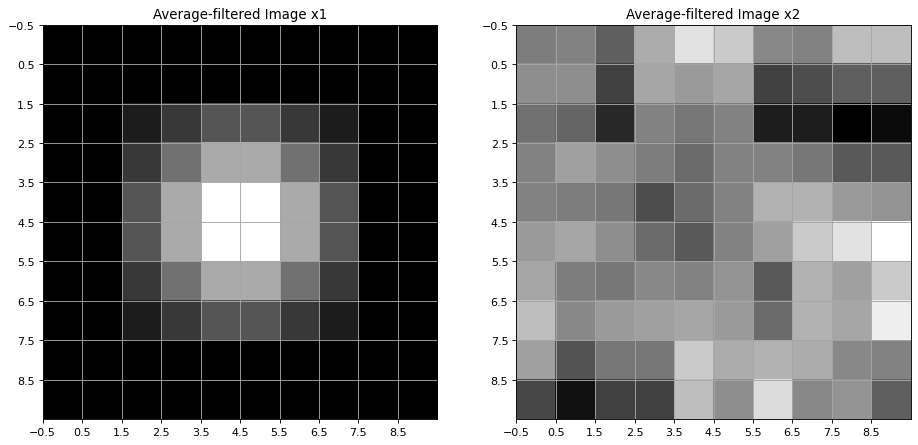

In [9]:
plt.figure(num=None, figsize=(14,7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(avg1,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Average-filtered Image x1')


plt.subplot(1,2,2)
plt.imshow(avg2,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Average-filtered Image x2')

## Filters for Edge Detection


The defining property of **Edges** are distinctive changes of pixel intensities. The change of values in a mathematical function $f(x)$ is measured by the function's 1st order derivative $f'(x)$. High positive values in $f'(x)$ correspond to a strong increase of values in $f(x)$ and $f'(x)=0$ indicates no change in the values of $f(x)$. This means that edges can be found by searching for the locations, where the 1st order derivative of an image has high absolut values. 

We start by recalling the definition of the 1st order derivative of uni- and bivariate functions: 


- 1-dimensional continuous function:

\begin{equation}
f'(x)=\frac{\partial f(x)}{\partial x} = \lim_{\epsilon \rightarrow 0} \frac{f(x+\epsilon)-f(x)}{\epsilon} 
\end{equation}

- 1-dimensional discrete function:

\begin{equation}
f'(x)=\frac{\partial f(x)}{\partial x} \approx \frac{f(x+1)-f(x)}{1}
\end{equation}

- 2-dimensional continuous function:

\begin{eqnarray}
\frac{\partial f(x,y)}{\partial x} & = & \lim_{\epsilon \rightarrow 0} \frac{f(x+\epsilon,y)-f(x,y)}{\epsilon} \\
\frac{\partial f(x,y)}{\partial y} & = & \lim_{\epsilon \rightarrow 0} \frac{f(x,y+\epsilon)-f(x,y)}{\epsilon}
\end{eqnarray}

- 2-dimensional discrete function (**Image**):

\begin{eqnarray}
\frac{\partial f(x,y)}{\partial x} & \approx & \frac{f(x+1,y)-f(x,y)}{1} \\
\frac{\partial f(x,y)}{\partial y} & \approx & \frac{f(x,y+1)-f(x,y)}{1}
\end{eqnarray}
  


### Filter for calculating 1st order derivative of discrete 1-dimensional signal
For a discrete 1-dimensional function the derivative is just the **difference between two successive values**. Calculating the difference of successive values in signal $f$ can be realized by convolving the signal with the filter

\begin{equation}
h=(1,-1)
\end{equation} 

or better (due to symmetry)

\begin{equation}
h=(1,0,-1)
\end{equation} 

The discrete derivative of $f$ is

\begin{equation}
\frac{\partial f}{\partial x}=h*f
\end{equation} 

This filter operation for calculating the 1st order derivative of a 1-dimensional signal has already be implemented [above](#1dimgrad)

### Filters for calculating 1st order derivative in images

Similar to the 1-dimensional case, for a 2-dimensional discrete signals $F$ the **partial derivative of $F$ in the direction of $x$** is calculated as convolution

\begin{equation}
\frac{\partial F}{\partial x}=H_x * F
\end{equation}

with the derivative filter

\begin{equation}
H_x = \left[ 
\begin{array}{ccc}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{array}
\right]
\end{equation}

The **partial derivative of $F$ in the direction of $y$** is calculated as convolution

\begin{equation}
\frac{\partial F}{\partial y}=H_y * F
\end{equation}

with the derivative filter

\begin{equation}
H_y = \left[ 
\begin{array}{ccc}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1 \\
\end{array}
\right]
\end{equation}

The filter pair $H_x$ and $H_y$ as defined above is called **Prewitt Filter**. 

Another frequently applied filter for edge-detection is the **Sobel Filter**, which is defined by: 

\begin{equation}
H_x = \left[ 
\begin{array}{ccc}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \\
\end{array}
\right] \quad \mbox{ and }
H_y = \left[ \begin{array}{ccc}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1 \\
\end{array}
\right]
\end{equation}

There exists even more edge-detection filters, for example der derivatives of the Gaussian, which are introduced in the [next section](04gaussianDerivatives.ipynb).

For all of the edge detectors 

\begin{equation}
\frac{\partial F}{\partial x}= H_x * F
\quad \mbox{ and } \quad
\frac{\partial F}{\partial y}= H_y * F
\end{equation}


constitute the **gradient of image $F$**:

\begin{equation}
\nabla F = \left( \begin{array}{c}
\frac{\partial F}{\partial x} \\
\frac{\partial F}{\partial y}
\end{array} \right)
\end{equation} 

The magnitude of the gradient is
\begin{equation}
\Vert \nabla F \Vert = \sqrt{\left(\frac{\partial F}{\partial x}\right)^2 + \left(\frac{\partial F}{\partial y}\right)^2}
\end{equation}

and its direction is

\begin{equation}
\theta = \arctan\left( \frac{\frac{\partial F}{\partial y}}{\frac{\partial F}{\partial x}}\right)
\end{equation}

**Edges** are at the **extremas** of $\Vert \nabla F \Vert$. 

### Implementation of Edge Detection in Images

The Prewitt filter for calculating the 1st order derivative of an image in x-direction is implemented as a 2-dimensional numpy-array

In [10]:
dx=np.array([[1.0, 0.0, -1.0],[1.0, 0.0, -1.0],[1.0, 0.0, -1.0],])
print("Prewitt Filter: \n",dx)

Prewitt Filter: 
 [[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]


For calculating the partial derivation in y-direction the transpose of dx is applied

In [11]:
dy=np.transpose(dx)
print("Filter: \n",dy)

Filter: 
 [[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]


The x-derivative and y-derivative of the 2-dimensional input signal x1 can then be calculated as follows

Text(0.5, 1.0, 'Response on Prewitt y-derivative filter')

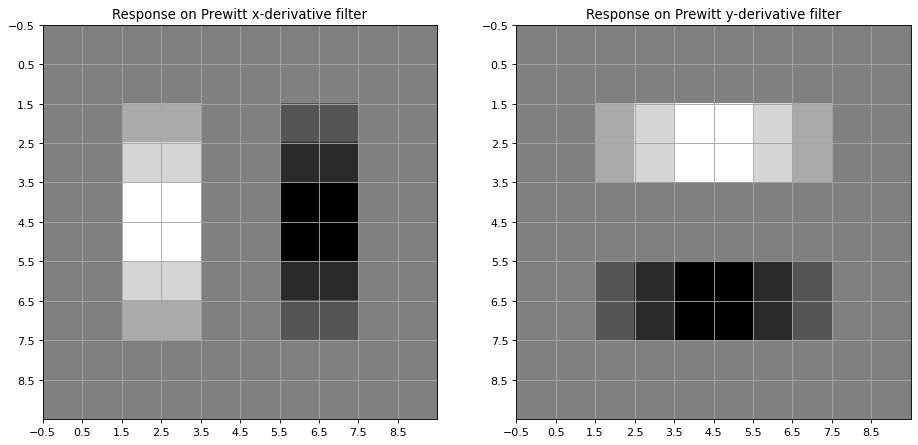

In [12]:
# Prewitt Filter
fo1=ndi.convolve(x1,dx, output=np.float64, mode='nearest')
#fo1=ndi.prewitt(x1,axis=1,output=np.float64, mode='nearest')
plt.figure(num=None, figsize=(14,7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(fo1,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Response on Prewitt x-derivative filter')
fo2=ndi.convolve(x1,dy, output=np.float64, mode='nearest')
plt.subplot(1,2,2)
plt.imshow(fo2,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Response on Prewitt y-derivative filter')

Another commonly applied filter for calculating the image gradient in x- and y direction is the **Sobel Filter**

Filter Sobel-x: 
 [[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
Filter Sobel-y: 
 [[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]


Text(0.5, 1.0, 'Response on Sobel y-derivative filter')

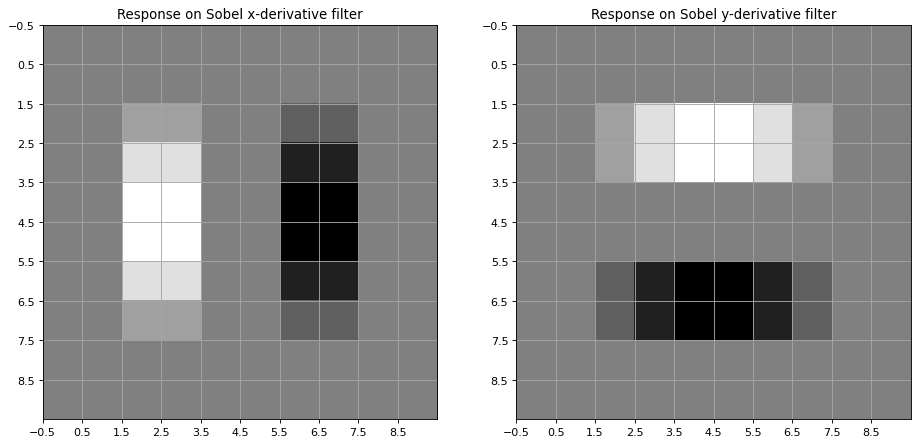

In [13]:
# Sobel Filter
dx=np.array([[1.0, 0.0, -1.0],[2.0, 0.0, -2.0],[1.0, 0.0, -1.0],])
dy=np.transpose(dx)
print("Filter Sobel-x: \n",dx)
print("Filter Sobel-y: \n",dy)
fo1=ndi.convolve(x1,dx, output=np.float64, mode='nearest')
#fo1=ndi.prewitt(x1,axis=1,output=np.float64, mode='nearest')
plt.figure(num=None, figsize=(14,7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(fo1,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Response on Sobel x-derivative filter')

fo2=ndi.convolve(x1,dy, output=np.float64, mode='nearest')
plt.subplot(1,2,2)
plt.imshow(fo2,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Response on Sobel y-derivative filter')

Above different techniques to calculate the derivatives of a 2-dimensional input signal have been shown. Now, the 2-dimensional input signal is a real greyscale image. In order to determine the horizontal and vertical edges of the image a Sobel filter is applied - here the Sobel-filter provided by the [Scipy ndimage package](http://docs.scipy.org/doc/scipy/reference/ndimage.html).

### Read RGB image and convert to greyscale

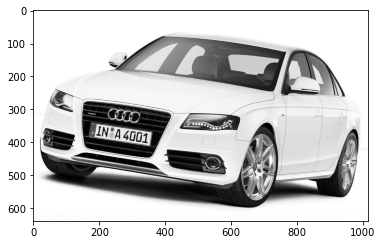

In [14]:
#im = np.array(Image.open("C:\Users\maucher\DataSets\ObjRec/alcatraz1.jpg").convert('L'))
im = np.array(Image.open("../Data/a4weiss.jpg").convert('L'))
plt.imshow(im,cmap='Greys_r')
plt.show()

### Apply Sobel Filter for calculating the x-derivative and y-derivative

In [15]:
imx = np.zeros(im.shape,dtype=np.float64)
ndi.filters.sobel(im,1,imx)
imy = np.zeros(im.shape,dtype=np.float64)
ndi.filters.sobel(im,0,imy)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 3.],
       [0., 0., 0., ..., 0., 1., 3.],
       [0., 0., 0., ..., 0., 0., 0.]])

The output of the Sobel filter is stored in the numpy arrays imx and imy, respectively. This type of filter invocation is recommended since it allows to control the accuracy. In Scipy multidimensional filter outputs are calculated by applying a sequence of 1-dimensional filters. The intermediate arrays are stored in the same data type as the output. Therefore, for output types with a lower precision, the results may be imprecise because intermediate results may be stored with insufficient precision. This can be prevented by specifying a more precise output type.

Moreover, the magnitude of the gradient is calculated and plotted to the matplotlib figure.

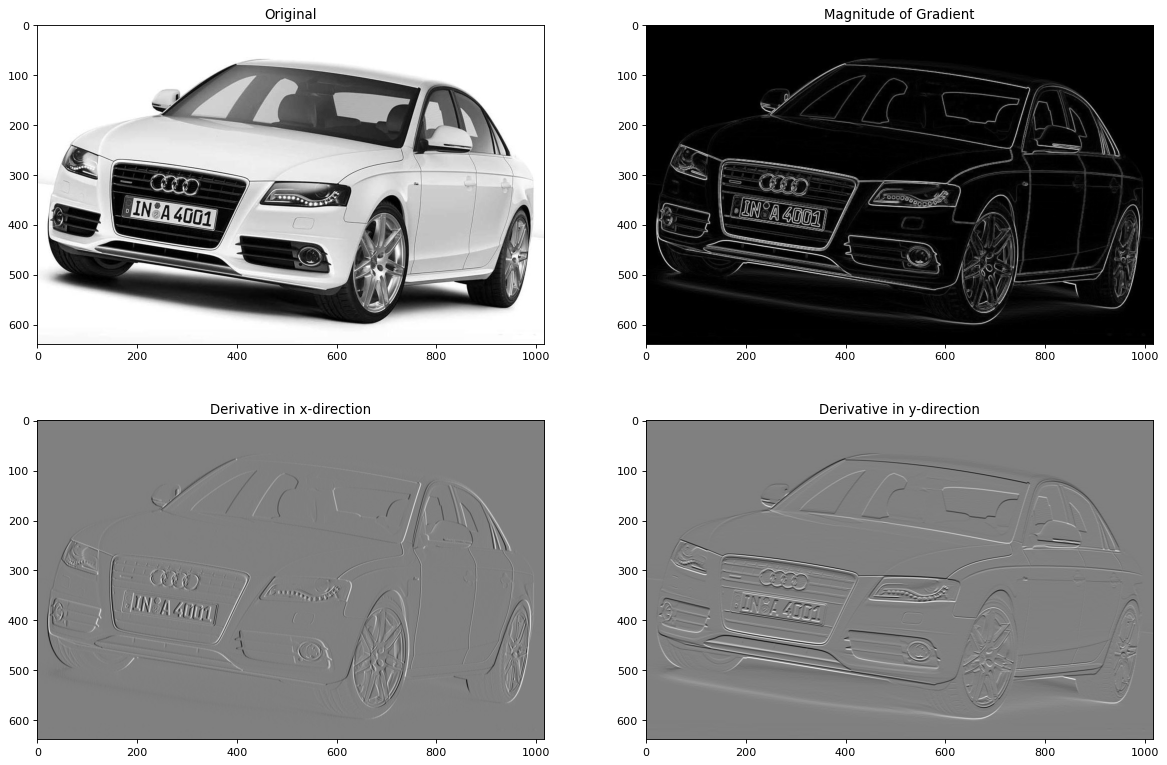

In [16]:
magnitude=np.sqrt(imx**2+imy**2)
plt.figure(num=None, figsize=(18,12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.imshow(im,cmap=plt.cm.gray)
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(magnitude,cmap=plt.cm.gray)
plt.title("Magnitude of Gradient")
plt.subplot(2,2,3)
plt.imshow(imx,cmap=plt.cm.gray)
plt.title('Derivative in x-direction')
plt.subplot(2,2,4)
plt.title('Derivative in y-direction')
plt.imshow(imy,cmap=plt.cm.gray)
plt.show()

## Template Matching
Template matching is a technique to find patterns in an image. For this a filter is configured whose response is the pattern. This filter is correlated over the image. A high correlation value at a given position indicates a high probability for the pattern at this position.

[Scikits-Image](http://scikit-image.org/) modules are applied in this excercise for importing the data, for template-matching and for indicating the positions where the pattern (template) is found in the image.

In [17]:
#from skimage import data
from skimage.feature import match_template
from skimage.draw import circle
from matplotlib import pyplot as plt
import numpy as np

The image is imported in python. The template applied here is a region of the image, which contains the identifiaction of a chip on a platine. The pattern and the image are plotted

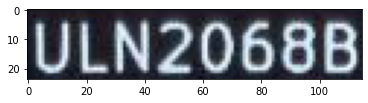

In [18]:
full=plt.imread('../Data/platine.JPG')
template=full[285:309,149:264]  #crop the pattern of interest
plt.imshow(template,cmap = plt.cm.gray)
plt.show()

The Scikits Image method match_template calculates the correlation of the pattern and the image at all possible positions. The returned matrx contains all correlation values.

In [19]:
correlation=match_template(full,template)

In the following loop all positions with a correlation value >0.9 are extracted from the correlation matrix.

In [20]:
xcoords=[]
ycoords=[]
for row in range(correlation.shape[0]):
        for col in range(correlation.shape[1]):
                if correlation[row,col]>0.9:
                        print(row,col,correlation[row,col])
                        xcoords.append(col)
                        ycoords.append(row)

285 149 [1.]
285 430 [0.964]
285 718 [0.95]
285 992 [0.973]
732 147 [0.954]
732 428 [0.971]


Finally, the positions with correlation value >0.9 are marked in the image

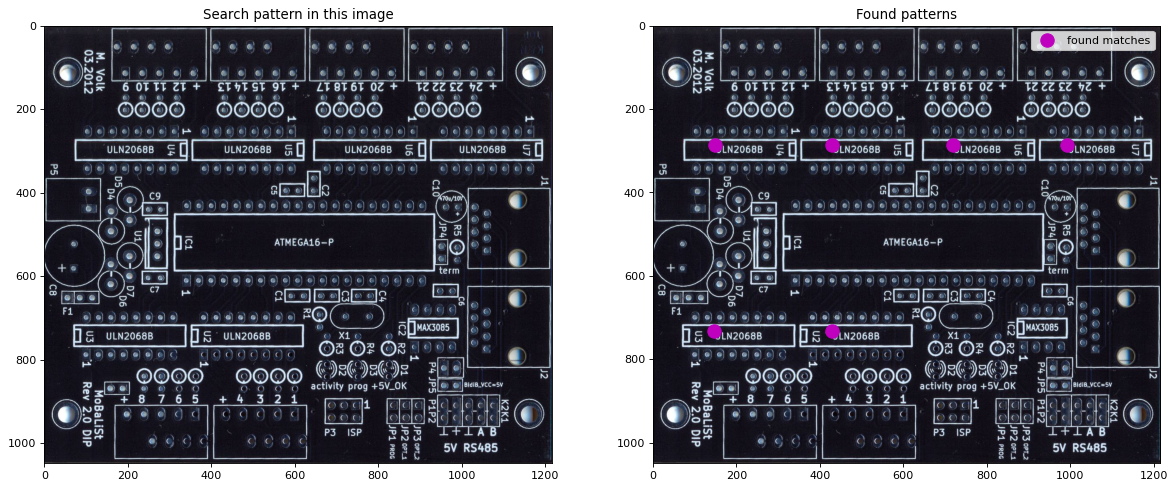

In [21]:
plt.figure(num=None, figsize=(18,12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Search pattern in this image")
plt.subplot(1,2,2)
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Found patterns")
plt.plot(xcoords,ycoords,'om',ms=12,label="found matches")
plt.legend(loc=2,numpoints=1)
plt.axis([0,1216,1049,0])
plt.legend()
plt.show()

## Mathematical Properties of Filters

- **Shift Invariance:** A filter is shift invariant, if it's output depends only on the values in the relevant region, not on the position of the region.

- **Linear Filter**, A filter is a linear filter, if and only if it fulfills the following two properties:

    - Superposition
    
        \begin{equation}
        H \odot (F_1 + F_2) = (H \odot F_1)+(H \odot F_2)
        \end{equation}
        
    - Scaling
    
        \begin{equation}
        H \odot (k F) = k(H \odot F)
        \end{equation}

Here $\odot$ denotes an arbitrary filter operation, not necessarily correlation or convolution.

The convolution operation $*$ is **shift invariant and linear**. Moreover, convolution has the following properties: 

- Commutative: 

$$H*G = G*H$$

- Associative: 

$$F*(G*H)=(F*G)*H$$

- Identity: 

$$
H * \delta = H, \mbox{ where }  \delta \mbox{ is the unit impulse } \delta=\left[ \ldots,0,0,1,0,0,\ldots \right]
$$ 

- Differentiation:

\begin{equation}
\frac{\partial}{\partial x}(H*G) = \frac{\partial H}{\partial x} *G
\end{equation} 

- **Fourier Transform:**
\begin{equation}
\mathcal{F}(H*G)=\mathcal{F}(H)\cdot \mathcal{F}(G)
\end{equation}

**Examples:**

- Averaging Filter (=Uniform Filter) and Gaussian Filter can be described as convolution. Thus they are linear and shift invariant.
- The Median Filter (next subsection) can not be described as convolution and is not linear.


## Median Filter

A median filter can not be described by convolution. As mentioned above, it is not a linear-filter. The median filter $H_k$ of half-width $k$ calculates it's output $G(i,j)$ from the Input $F$ as follows: 

1. Order all pixel values in the region 

$$
F[i-k:i+k,j-k:j+k]
$$

2. Then the filter output $G(i,j)$ is the value, which is in the center of the ordered list.

**Example:**

<img src="https://maucher.home.hdm-stuttgart.de/Pics/medianFilter.png" style="width:500px" align="center">

Important features of the Median Filter are:

- No new pixel values
- Keeps edges sharp
- Removes spikes (Salt and Pepper Noise)

The application of the Median Filter on images, disturbed by Salt-and-Pepper Noise is shown in [this section](06GaussianNoiseReduction).